In [18]:


import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random
import pandas as pd



3.4.3


In [19]:

def ode_demo(y,t,b,g,m):
    """
    Differential equation of a SIR model with equal birth and deathrate.

    Arguments:
    y --
    t -- time index (days)
    b -- beta parameter (infectiousness)
    g -- gamma parameter (recovery rate)
    m -- mu parameter (birth and deathrate)
    """
    s,i,r = y
    dsdt = m - b * s * i - m * s
    didt = b * s * i - g * i - m * i
    drdt = g * i - m * r

    return dsdt, didt, drdt

def SIR_demo(n, max_t, beta, gamma, mu):
  S = [0.99*n]
  I = [0.01*n]
  R = [0]
  t = [0]

  while t[-1] < max_t:
    # Set rates
    rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
            mu * I[-1], gamma * I[-1],  # rate(I)
            mu * R[-1]]  # rate(R)

    rates_sum = sum(rates)
    dt = -1*np.log(np.random.random()) / rates_sum
    t.append(t[-1] + dt)

    rand = np.random.random()

    # Death S
    if rand * rates_sum < rates[0]:
        S.append(S[-1] - 1 + 1)
        I.append(I[-1])
        R.append(R[-1])

    # Infection
    elif rand * rates_sum > rates[0] and rand * rates_sum < sum(rates[:2]):
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])

    # Death I
    elif rand * rates_sum > sum(rates[:2]) and rand * rates_sum < sum(rates[:3]):
        S.append(S[-1] + 1)
        I.append(I[-1] - 1)
        R.append(R[-1])

    # Recovered
    elif rand * rates_sum > sum(rates[:3]) and rand * rates_sum < sum(rates[:4]):
        S.append(S[-1])
        I.append(I[-1] - 1)
        R.append(R[-1] + 1)

    # Death R
    elif rand * rates_sum > sum(rates[:4]) and rand * rates_sum < sum(rates[:5]):
        S.append(S[-1] + 1)
        I.append(I[-1])
        R.append(R[-1] - 1)

  return S, I, R, t



def SIR_import(n, max_t, beta, gamma, mu, epsilon):
  S = [n]
  I = [0]
  R = [0]
  t = [0]
  extinctions = 0

  while t[-1] < max_t:
    # Set rates
    rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
            mu * I[-1], gamma * I[-1],  # rate(I)
            mu * R[-1],  # rate(R)
            epsilon * S[-1]] # Import

    rates_sum = sum(rates)
    dt = -1*np.log(np.random.random()) / rates_sum
    t.append(t[-1] + dt)

    rand = np.random.random()

    # Death S
    if rand * rates_sum < rates[0]:
        S.append(S[-1] - 1 + 1)
        I.append(I[-1])
        R.append(R[-1])

    # Infection
    elif rand * rates_sum > rates[0] and rand * rates_sum < sum(rates[:2]):
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])

    # Death I
    elif rand * rates_sum > sum(rates[:2]) and rand * rates_sum < sum(rates[:3]):
        S.append(S[-1] + 1)
        I.append(I[-1] - 1)
        R.append(R[-1])

        # Extinctions
        if I[-1] < 1:
          extinctions += 1

    # Recovered
    elif rand * rates_sum > sum(rates[:3]) and rand * rates_sum < sum(rates[:4]):
        S.append(S[-1])
        I.append(I[-1] - 1)
        R.append(R[-1] + 1)

        # Extinctions
        if I[-1] < 1:
          extinctions += 1

    # Death R
    elif rand * rates_sum > sum(rates[:4]) and rand * rates_sum < sum(rates[:5]):
        S.append(S[-1] + 1)
        I.append(I[-1])
        R.append(R[-1] - 1)

    # Import
    elif rand * rates_sum > sum(rates[:5]) and rand * rates_sum < rates_sum:
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])

  return S, I, R, t, extinctions

TypeError: __init__() got an unexpected keyword argument 'lintreshy'

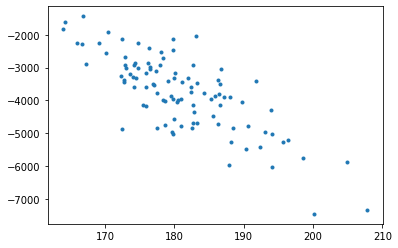

In [20]:

beta = 0.75
gamma = 0.25
mu = 0.05
population = 1000
max_t = 60
covlist= []
noiselist = []


for i in range(100):
    S, I, R, T = SIR_demo(population, max_t, beta, gamma, mu)
    cov = np.cov(S, I)[0, 1]
    covlist.append(cov)
    noise = np.std(S)
    noiselist.append(noise)


plt.figure()
plt.plot(noiselist, covlist, '.')
plt.yscale('symlog', lintreshy=0.01)
plt.ylim(np.min(covlist)*1.5, 0)
plt.xlim(2*np.exp()**2)
plt.show()
